# Train
https://mapreader.readthedocs.io/en/latest/User-guide/Train.html

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Read annotations

In [2]:
from mapreader import loadAnnotations

In [3]:
annotated_images = loadAnnotations()

annotated_images.load("./annotations_one_inch/rail_space_#rw#.csv", 
                      path2dir="./maps/slice_50_50")

* reading: ./annotations_one_inch/rail_space_#rw#.csv
* #rows: 335
* label column name: label (you can change this later by .set_col_label(new_label) )
* shuffle rows: Yes
* update paths in 'image_id' column by inserting './maps/slice_50_50'

------------------------
* Number of annotations: 335

* First few rows:
                                            image_id  label
0  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
1  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
2  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
3  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
4  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
...

* Value counts (column: label):
1    303
2     32
Name: label, dtype: int64
------------------------



In [4]:
annotated_images.annotations

,image_id,label
0,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
1,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
2,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
3,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
4,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
...,...,...
330,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
331,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
332,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
333,/Users/rwood/LwM/MapReader/worked_examples/geo...,1


In [5]:
print(annotated_images)

------------------------
* Number of annotations: 335

* First few rows:
                                            image_id  label
0  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
1  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
2  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
3  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
4  /Users/rwood/LwM/MapReader/worked_examples/geo...      1
...

* Value counts (column: label):
1    303
2     32
Name: label, dtype: int64
------------------------



In [6]:
# Shift labels so that they start from 0
annotated_images.adjust_labels(shiftby=-1)

--------------------
[INFO] value counts before shift:
1    303
2     32
Name: label, dtype: int64
--------------------
[INFO] value counts after shift:
0    303
1     32
Name: label, dtype: int64
--------------------


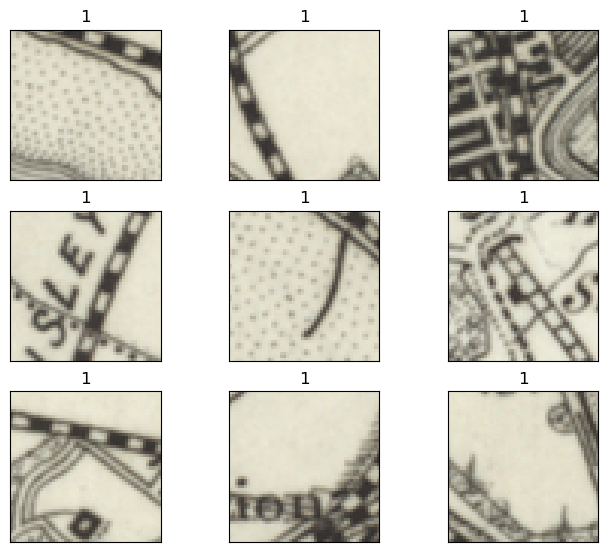

In [7]:
# show sample images for target label (tar_label)
annotated_images.show_image_labels(tar_label=1, num_sample=9)

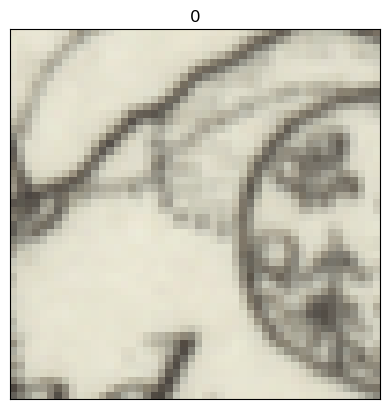

In [8]:
# show an image based on its index 
annotated_images.show_image(indx=14)


******************************
[INFO] review 1-48, total: 335
******************************
Enter 'ids', comma separated (or press enter to continue)  :  

******************************
[INFO] review 49-96, total: 335
******************************


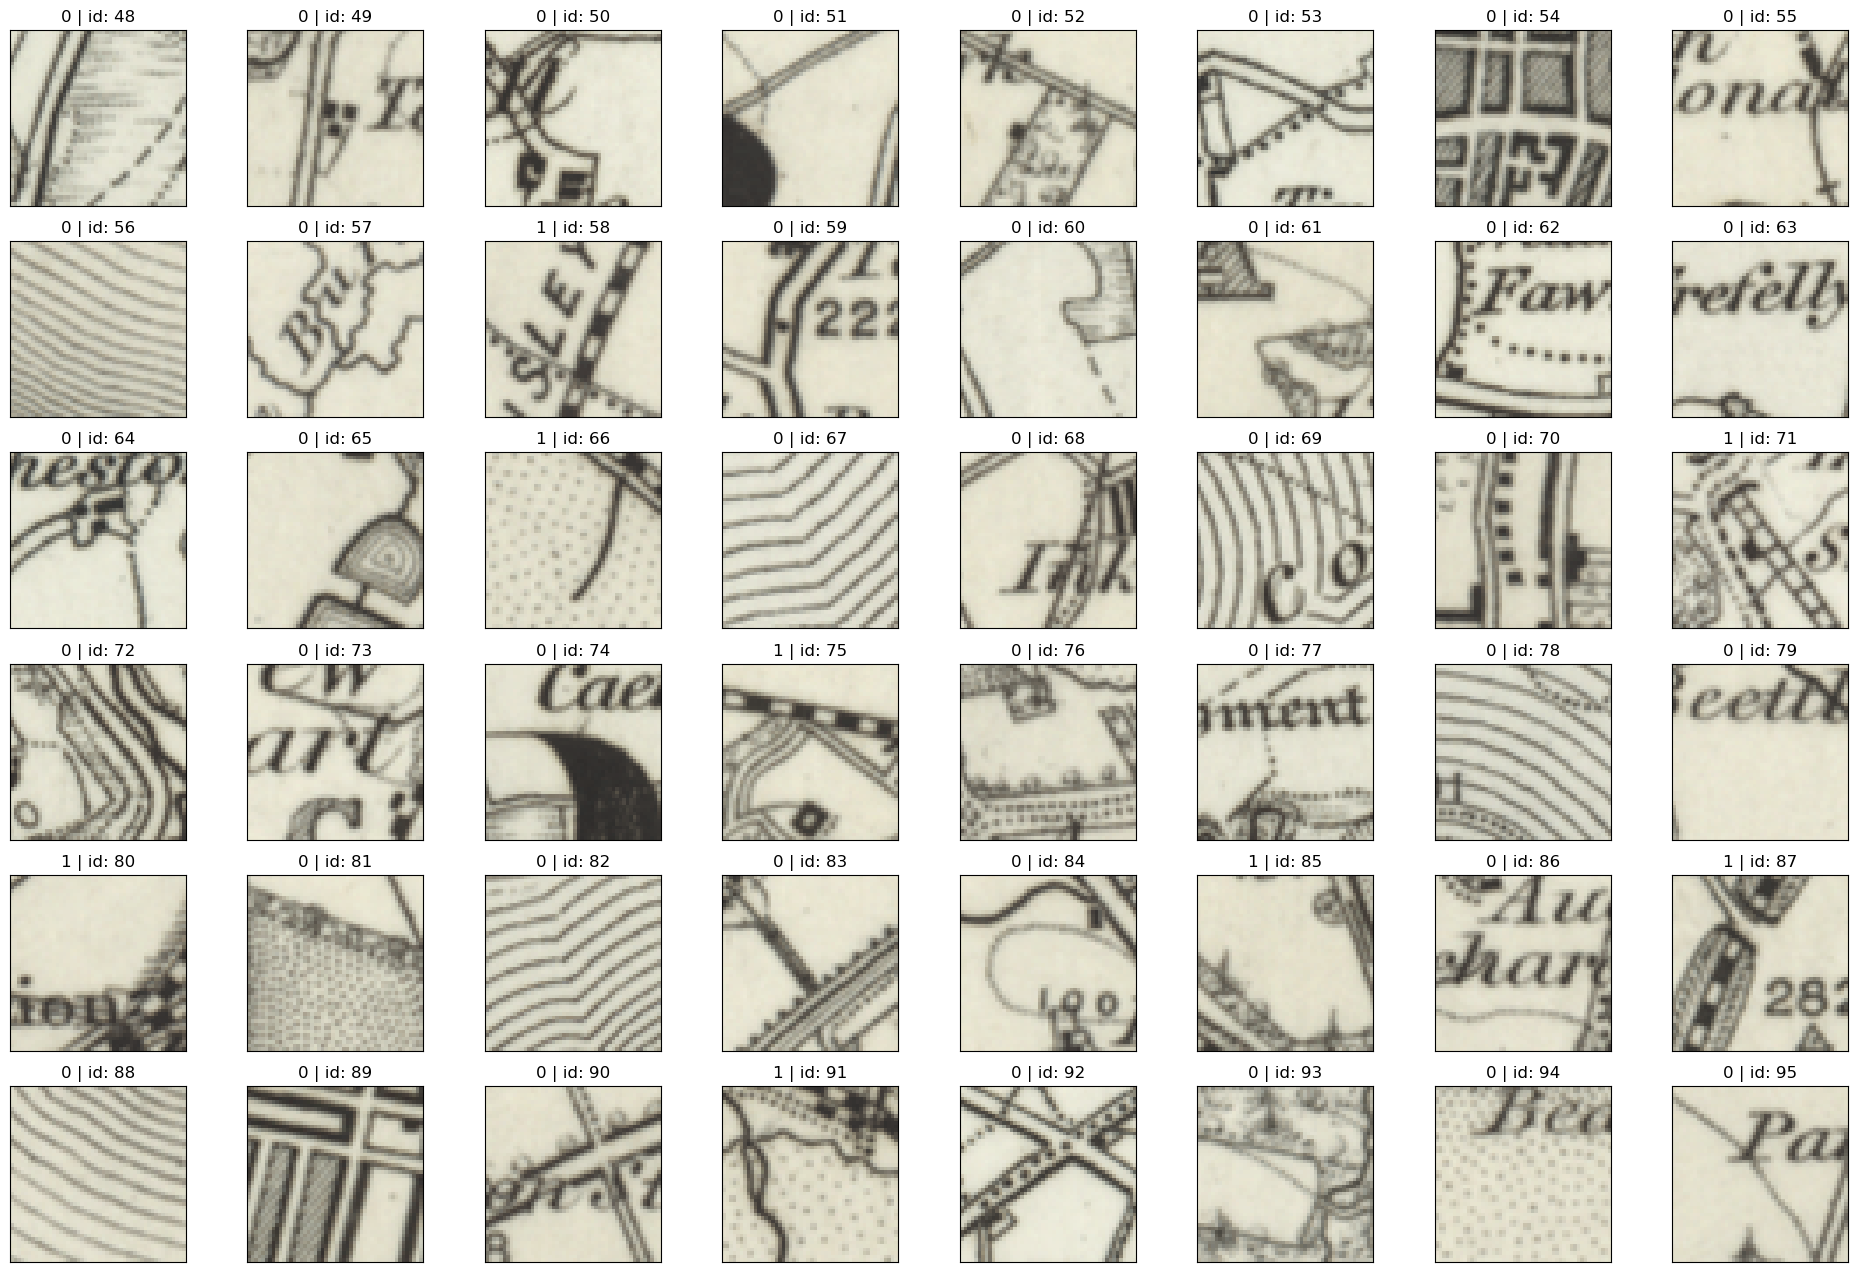

list of IDs: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
Enter 'ids', comma separated (or press enter to continue)  :  

******************************
[INFO] review 97-144, total: 335
******************************


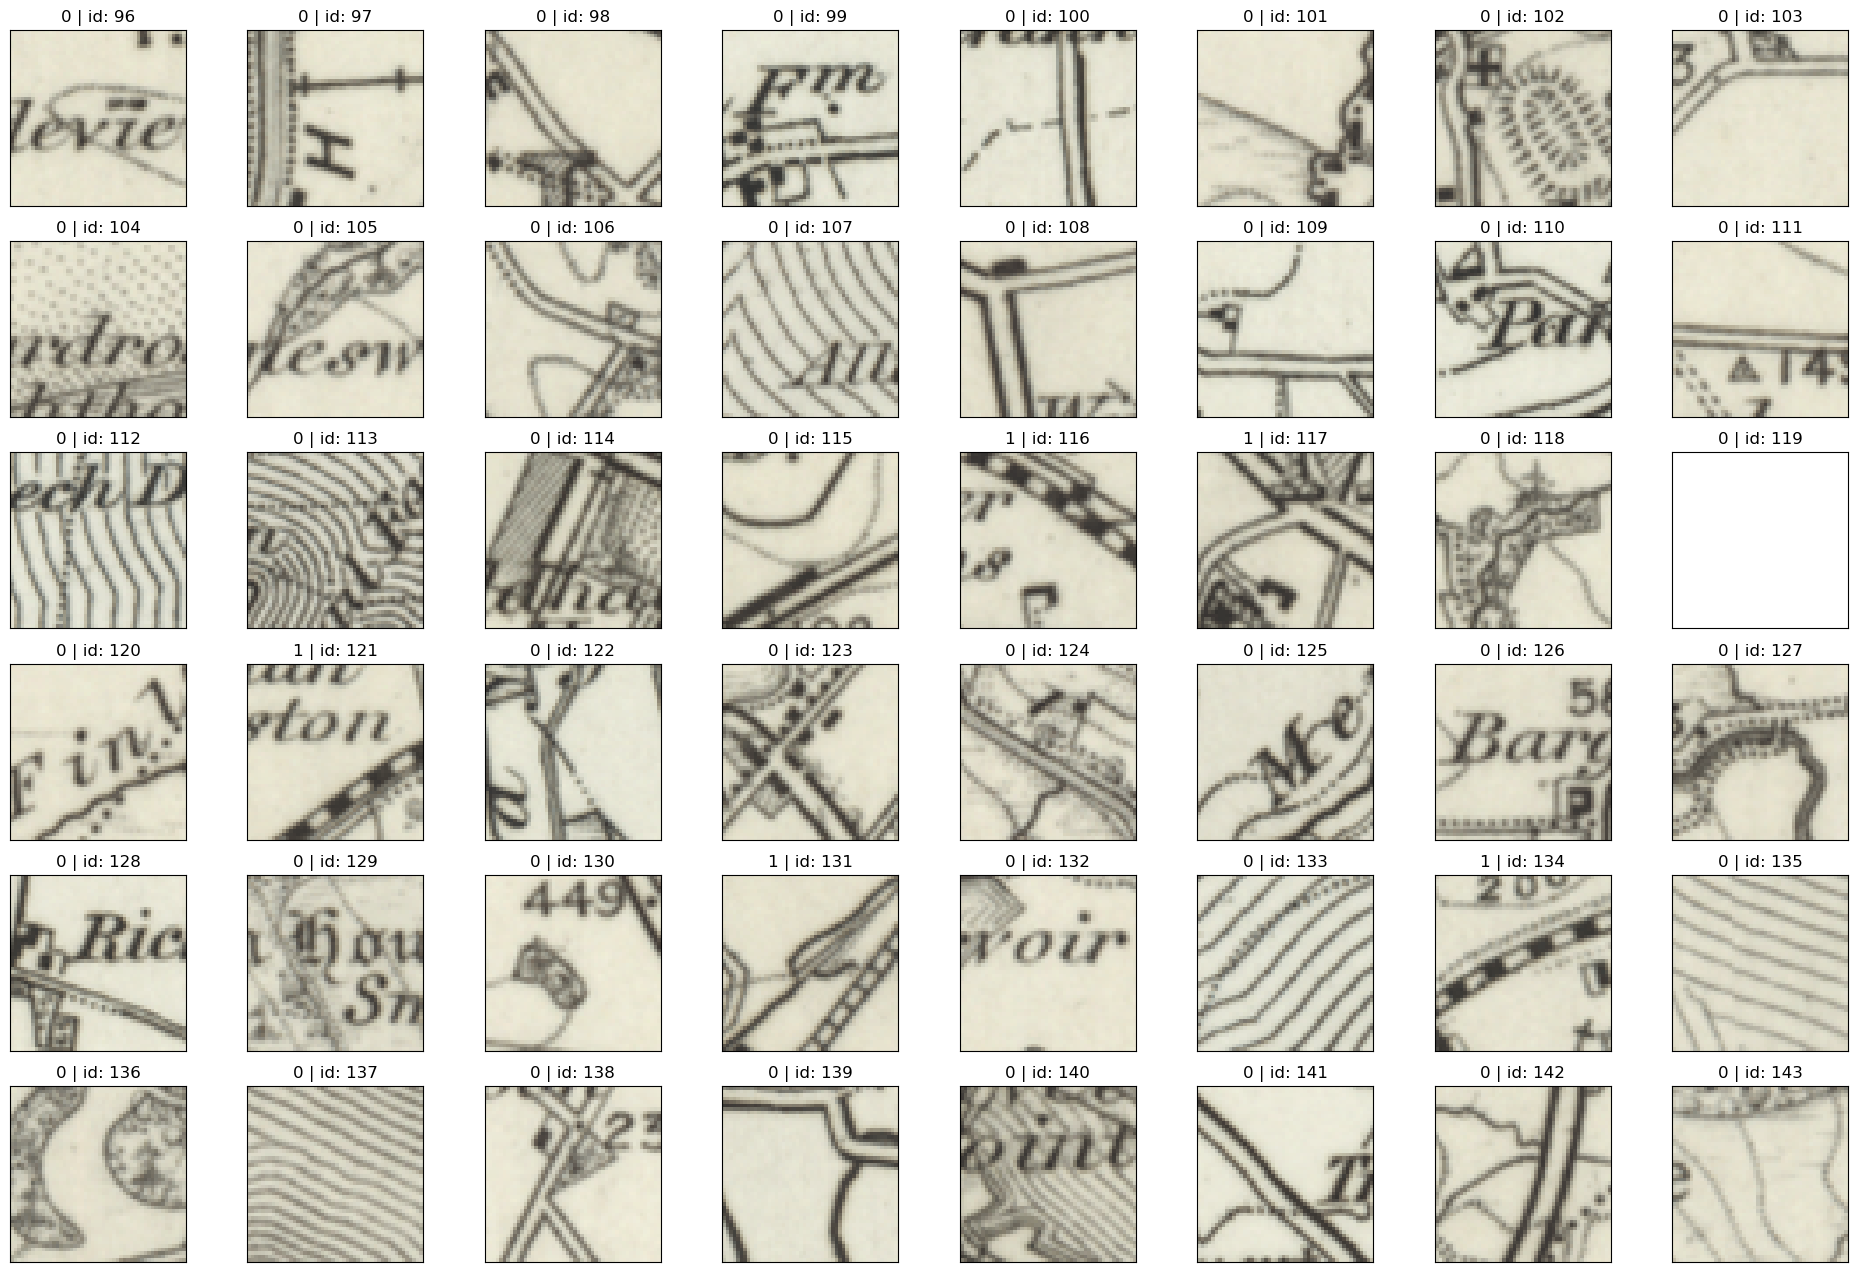

list of IDs: [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]
Enter 'ids', comma separated (or press enter to continue)  :  end
[INFO] Exit...


In [9]:
annotated_images.review_labels()

## Split annotations into train/val/test

In [10]:
annotated_images.split_annotations()

---------------------
* Split dataset into:
    Train: 234
    Valid: 50
    Test : 51
---------------------


In [11]:
annotated_images.train.head()

,image_id,label
71,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
148,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
136,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
142,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
203,/Users/rwood/LwM/MapReader/worked_examples/geo...,0


In [12]:
annotated_images.train["label"].value_counts()

0    212
1     22
Name: label, dtype: int64

In [13]:
annotated_images.val["label"].value_counts()

0    45
1     5
Name: label, dtype: int64

In [14]:
annotated_images.test["label"].value_counts()

0    46
1     5
Name: label, dtype: int64

## Prepare datasets

In [15]:
import numpy as np
from torchvision import transforms
from mapreader import patchTorchDataset
import torch

In [16]:
resize = 224

#mean values of 'mean_pixel_R/G/B' and 'std_pixel_R/G/B'
normalize_mean = 1 - np.array([0.791667, 0.781116, 0.716220])
normalize_std = 1 - np.array([0.118752, 0.120394, 0.113254])

data_transforms = transforms.Compose([transforms.Resize(resize), 
                                      transforms.ToTensor(), 
                                      transforms.Normalize(normalize_mean,normalize_std)])


In [17]:
train_dataset = patchTorchDataset(annotated_images.train, transform=data_transforms)
val_dataset = patchTorchDataset(annotated_images.val, transform=data_transforms)
test_dataset  = patchTorchDataset(annotated_images.test, transform=data_transforms)

In [18]:
train_dataset.patchframe

,image_id,label
71,/Users/rwood/LwM/MapReader/worked_examples/geo...,1
148,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
136,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
142,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
203,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
...,...,...
265,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
3,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
230,/Users/rwood/LwM/MapReader/worked_examples/geo...,0
243,/Users/rwood/LwM/MapReader/worked_examples/geo...,0


In [19]:
train_count_list=train_dataset.patchframe["label"].value_counts().to_list()
val_count_list=val_dataset.patchframe["label"].value_counts().to_list()

weights = np.reciprocal(torch.Tensor(train_count_list))
weights = weights.double()

In [20]:
train_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights[train_dataset.patchframe["label"].to_list()], 
    num_samples=len(train_dataset))

valid_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    weights[val_dataset.patchframe["label"].to_list()], 
    num_samples=len(val_dataset))

## Set up `classifier`

### Load datasets

In [21]:
from mapreader import classifier

In [22]:
my_classifier = classifier()

[INFO] Device is set to cpu


In [23]:
batch_size = 8

# Add training dataset
my_classifier.add2dataloader(train_dataset, 
                            set_name="train", 
                            batch_size=batch_size, 
                            shuffle=False,
                            sampler=train_sampler
                           )

# Add validation dataset
my_classifier.add2dataloader(val_dataset, 
                            set_name="val", 
                            batch_size=batch_size, 
                            shuffle=False, 
                            sampler=valid_sampler
                           )

[INFO] added 'train' dataloader with 234 elements.
[INFO] added 'val' dataloader with 50 elements.


In [24]:
my_classifier.dataset_sizes

{'train': 234, 'val': 50}

In [25]:
my_classifier.print_classes_dl('train')

[INFO] labels:      [1, 0]


In [26]:
class_names = {0: "No", 1: "rail space"}
my_classifier.set_classnames(class_names)

my_classifier.print_classes_dl('train')

[INFO] labels:      [1, 0]
[INFO] class-names: {0: 'No', 1: 'rail space'}


[INFO] dataset: train
#samples:    234
#batch size: 8
#batches:    30


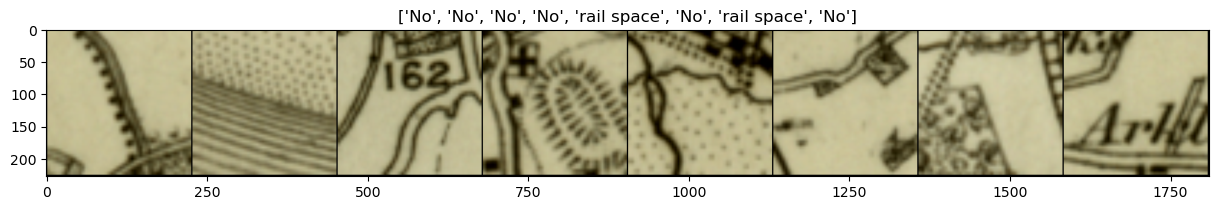

In [27]:
my_classifier.show_sample(set_name='train', batch_number=3)

### Load a (pretrained) PyTorch model

In [28]:
my_classifier.initialize_model("resnet18")

[INFO] labels:      [1, 0]
[INFO] class-names: {0: 'No', 1: 'rail space'}


In [29]:
my_classifier.model_summary()

------------------------------------------------------------------------------------------
|                                  modules |           parameters |                  dim
------------------------------------------------------------------------------------------
|                             conv1.weight |                 9408 |        [64, 3, 7, 7] |
|                               bn1.weight |                   64 |                 [64] |
|                                 bn1.bias |                   64 |                 [64] |
|                    layer1.0.conv1.weight |                36864 |       [64, 64, 3, 3] |
|                      layer1.0.bn1.weight |                   64 |                 [64] |
|                        layer1.0.bn1.bias |                   64 |                 [64] |
|                    layer1.0.conv2.weight |                36864 |       [64, 64, 3, 3] |
|                      layer1.0.bn2.weight |                   64 |                 [64] |
|

### Set up optimisier, scheduler and criterion

In [34]:
params_to_optimise = my_classifier.layerwise_lr(min_lr=1e-4, max_lr=1e-3, ltype='geomspace')

In [35]:
my_classifier.initialize_optimizer(params2optim=params_to_optimise)

In [36]:
my_classifier.initialize_scheduler()

In [37]:
criterion = torch.nn.CrossEntropyLoss()

my_classifier.add_criterion(criterion)

## Train/fine-tune model

**Note:** it is possible to interrupt a training (using Kernel/Interrupt in Jupyter Notebook or ctrl+C). 

In [38]:
my_classifier.train(num_epochs=10, 
                   save_model_dir="./models_tutorial", 
                   tensorboard_path="tboard_tutorial", 
                   verbosity_level=0,
                   tmp_file_save_freq=2,
                   remove_after_load=False,
                   print_info_batch_freq=5)

2023-03-08 14:39:20 JY5FK6W3K5 [INFO] train    -- 1/10 --       8/234 (  3.4%) -- Loss: 1.037
2023-03-08 14:39:21 JY5FK6W3K5 [INFO] train    -- 1/10 --      48/234 ( 20.5%) -- Loss: 0.389
2023-03-08 14:39:22 JY5FK6W3K5 [INFO] train    -- 1/10 --      88/234 ( 37.6%) -- Loss: 0.003
2023-03-08 14:39:24 JY5FK6W3K5 [INFO] train    -- 1/10 --     128/234 ( 54.7%) -- Loss: 0.252
2023-03-08 14:39:25 JY5FK6W3K5 [INFO] train    -- 1/10 --     168/234 ( 71.8%) -- Loss: 0.349
2023-03-08 14:39:26 JY5FK6W3K5 [INFO] train    -- 1/10 --     208/234 ( 88.9%) -- Loss: 0.019
2023-03-08 14:39:27 JY5FK6W3K5 [INFO] train    -- 1/10 -- Loss: 0.454; F_macro: 82.90; R_macro: 82.97
2023-03-08 14:39:27 JY5FK6W3K5 [INFO] val      -- 1/10 --        8/50 ( 16.0%) -- Loss: 6.674
2023-03-08 14:39:28 JY5FK6W3K5 [INFO] val      -- 1/10 --       48/50 ( 96.0%) -- Loss: 0.002
2023-03-08 14:39:28 JY5FK6W3K5 [INFO] val      -- 1/10 -- Loss: 5.160; F_macro: 52.38; R_macro: 60.00

2023-03-08 14:39:28 JY5FK6W3K5 [INFO] train

2023-03-08 14:40:10 JY5FK6W3K5 [INFO] val      -- 6/10 --       48/50 ( 96.0%) -- Loss: 0.790
2023-03-08 14:40:10 JY5FK6W3K5 [INFO] val      -- 6/10 -- Loss: 0.800; F_macro: 66.04; R_macro: 70.37

SAVE temp file: tmp_62080583_checkpoint.pkl | set .last_epoch: 6
[INFO] SAVE temp file: tmp_62080583_checkpoint.pkl | set .last_epoch: 6

2023-03-08 14:40:10 JY5FK6W3K5 [INFO] train    -- 7/10 --       8/234 (  3.4%) -- Loss: 0.001
2023-03-08 14:40:11 JY5FK6W3K5 [INFO] train    -- 7/10 --      48/234 ( 20.5%) -- Loss: 0.006
2023-03-08 14:40:13 JY5FK6W3K5 [INFO] train    -- 7/10 --      88/234 ( 37.6%) -- Loss: 0.001
2023-03-08 14:40:14 JY5FK6W3K5 [INFO] train    -- 7/10 --     128/234 ( 54.7%) -- Loss: 0.001
2023-03-08 14:40:15 JY5FK6W3K5 [INFO] train    -- 7/10 --     168/234 ( 71.8%) -- Loss: 0.002
2023-03-08 14:40:17 JY5FK6W3K5 [INFO] train    -- 7/10 --     208/234 ( 88.9%) -- Loss: 0.013
2023-03-08 14:40:18 JY5FK6W3K5 [INFO] train    -- 7/10 -- Loss: 0.079; F_macro: 97.40; R_macro: 97.40

In [39]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

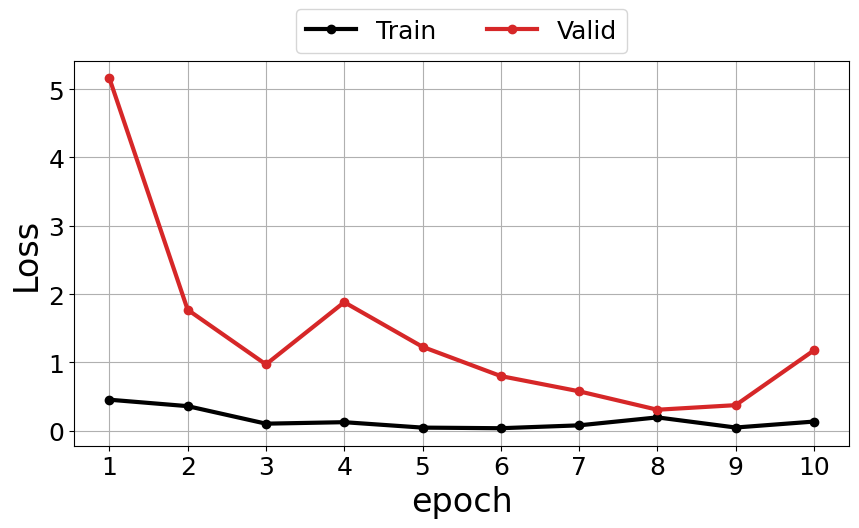

In [40]:
my_classifier.plot_metric(y_axis=["epoch_loss_train", "epoch_loss_val"],
                         y_label="Loss",
                         legends=["Train", "Valid"])

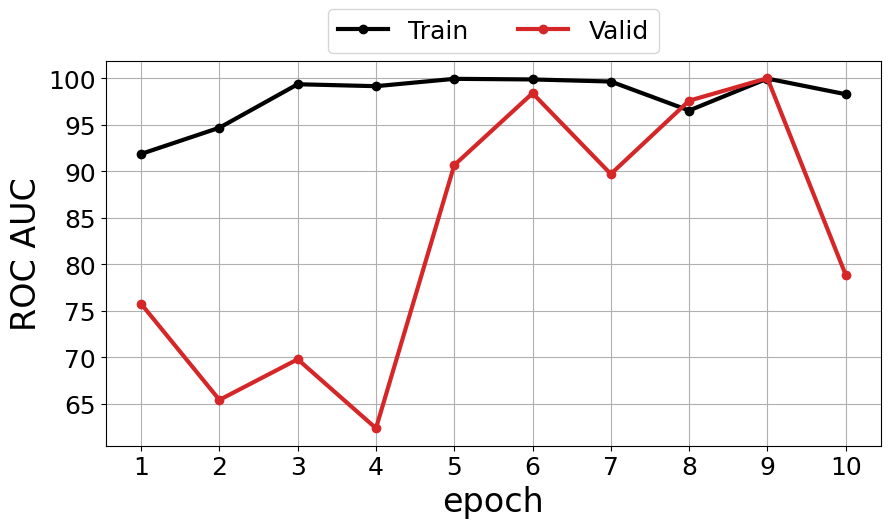

In [41]:
my_classifier.plot_metric(y_axis=["epoch_rocauc_macro_train", "epoch_rocauc_macro_val"],
                         y_label="ROC AUC",
                         legends=["Train", "Valid"],
                         colors=["k", "tab:red"])

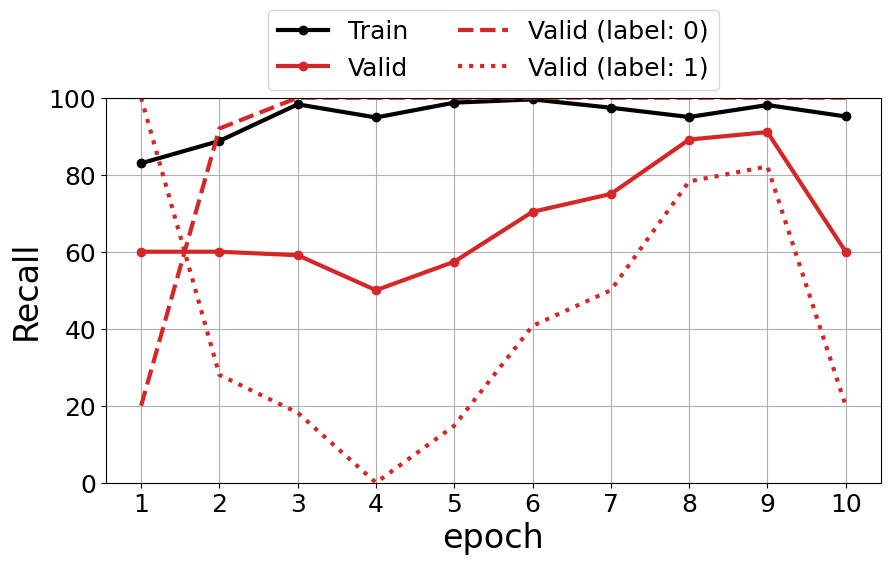

In [42]:
my_classifier.plot_metric(y_axis=["epoch_recall_macro_train", 
                                 "epoch_recall_macro_val", 
                                 "epoch_recall_0_val", 
                                 "epoch_recall_1_val"],
                         y_label="Recall",
                         legends=["Train", 
                                  "Valid", 
                                  "Valid (label: 0)",
                                  "Valid (label: 1)",],
                         colors=["k", "tab:red", "tab:red", "tab:red"],
                         styles=["-", "-", "--", ":"],
                         markers=["o", "o", "", ""],
                         plt_yrange=[0, 100])

## Test model on test set

In [43]:
my_classifier.add2dataloader(test_dataset, 
                            set_name="test", 
                            batch_size=batch_size)

[INFO] added 'test' dataloader with 51 elements.


In [44]:
my_classifier.inference(set_name="test")

2023-03-08 14:43:14 JY5FK6W3K5 [INFO] test     -- 11/11 --        8/51 ( 15.7%) -- 
2023-03-08 14:43:14 JY5FK6W3K5 [INFO] test     -- 11/11 --       48/51 ( 94.1%) -- 
Total time: 0m 1s


In [45]:
# Calculate metrics using inference outputs
my_classifier.calculate_add_metrics(y_true=my_classifier.orig_label, 
                                   y_pred=my_classifier.pred_label,
                                   y_score=my_classifier.pred_conf,
                                   phase="test")

In [46]:
# list of calculated metrics (for test set):
[k for k in my_classifier.metrics if "test" in k]

['epoch_prec_micro_test',
 'epoch_recall_micro_test',
 'epoch_fscore_micro_test',
 'epoch_supp_micro_test',
 'epoch_rocauc_micro_test',
 'epoch_prec_macro_test',
 'epoch_recall_macro_test',
 'epoch_fscore_macro_test',
 'epoch_supp_macro_test',
 'epoch_rocauc_macro_test',
 'epoch_prec_weighted_test',
 'epoch_recall_weighted_test',
 'epoch_fscore_weighted_test',
 'epoch_supp_weighted_test',
 'epoch_rocauc_weighted_test',
 'epoch_prec_0_test',
 'epoch_recall_0_test',
 'epoch_fscore_0_test',
 'epoch_supp_0_test',
 'epoch_prec_1_test',
 'epoch_recall_1_test',
 'epoch_fscore_1_test',
 'epoch_supp_1_test']

In [47]:
print(my_classifier.metrics["epoch_fscore_micro_test"])
print(my_classifier.metrics["epoch_rocauc_weighted_test"])

[94.11764705882352]
[92.6086956521739]


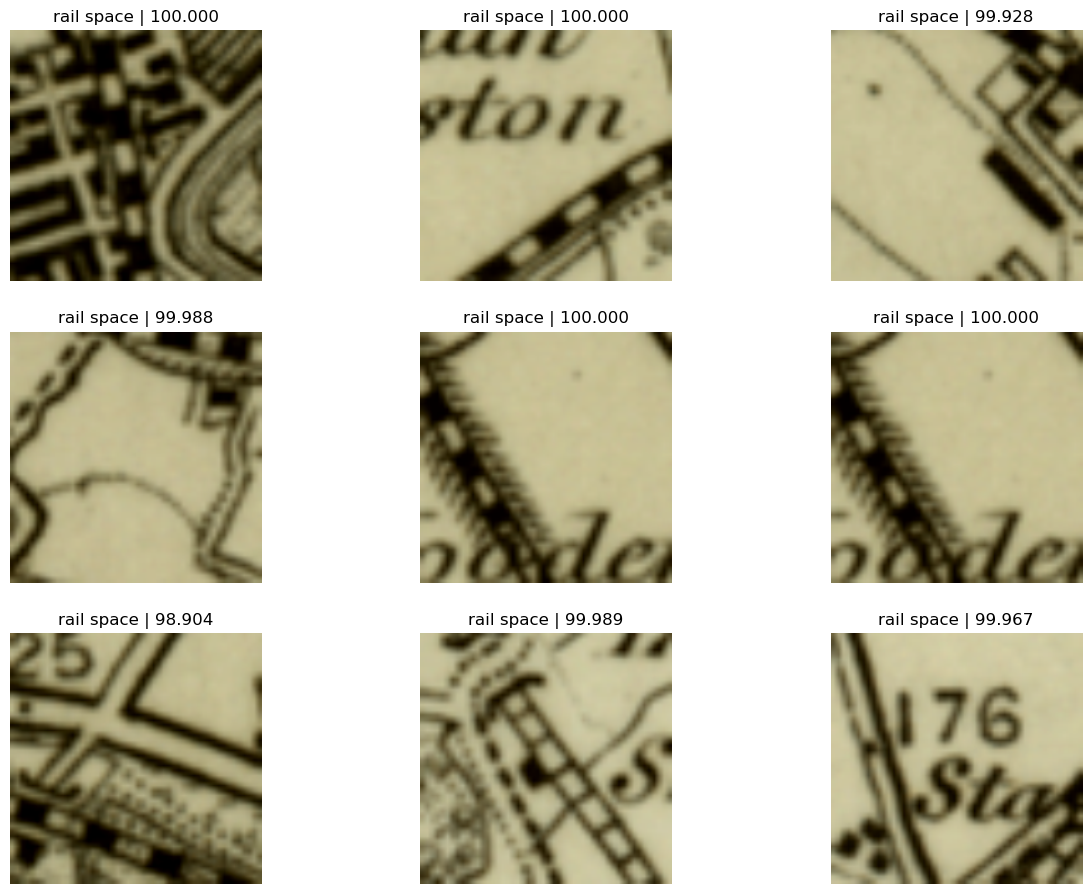

In [48]:
my_classifier.inference_sample_results(class_index=1, num_samples=9)